In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [69]:
customer_df=pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.head())
display(customer_df.shape)
display(customer_df.dtypes)
display(customer_df.isna().sum())


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

DataSet has no nan values => 4.01.12 and 4.02.3 are finished 

In [21]:
#Change format of column names
customer_df.columns=[x.lower() for x in customer_df.columns]
customer_df.columns=[x.replace(' ','_') for x in customer_df.columns]
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [22]:
#Change format of effective_to_date to datetime
from datetime import datetime
customer_df.effective_to_date=customer_df.effective_to_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
display(customer_df.head())

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


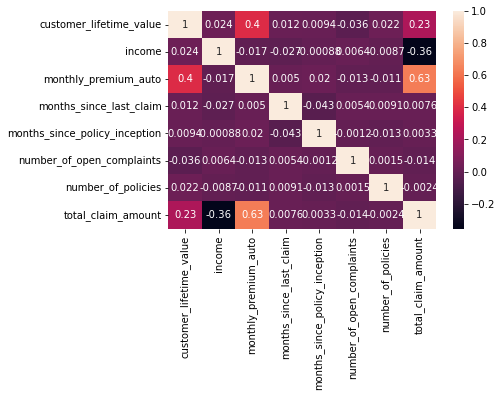

In [24]:
# split between numerics and objects
numerics = customer_df.select_dtypes(np.number)
categorical_df = customer_df.select_dtypes(object)

#get correlation matrix of the numerics 
corr_matrix=numerics.corr()
ig, ax = plt.subplots()
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


strong correlation between total_claim_amount and monthly_premium_auto (could be assumed before)
negative correlations between income and total_claim_amount (surprisingly)
correlation between total_claim_amount and customer_lifetime_value (could be assumed before)
higher correlations between monthly_premium_auto and customer_lifetime_value

In [36]:
# split continuous and discrete variables 
# function make a list of discrete and continous variables
# col is the list of columns and n is the cutoff value which will be used to differ between discrete and continuous values 
# by default n = 10

def con_dis_split(col, n=10):
    con,dis=[],[]
    for x in col:
        if len(numerics[x].unique()) > n:
            con.append(x)
        else:
            dis.append(x)
    return con,dis

con,dis=con_dis_split(numerics.columns)
continuous_df=numerics[con]
discrete_df=numerics[dis]
display(discrete_df.head())
display(continuous_df.head())

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


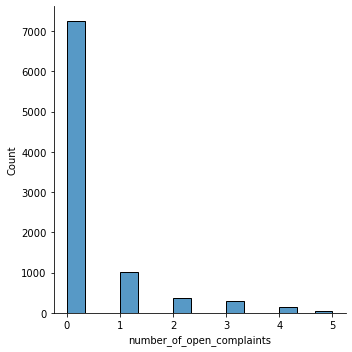

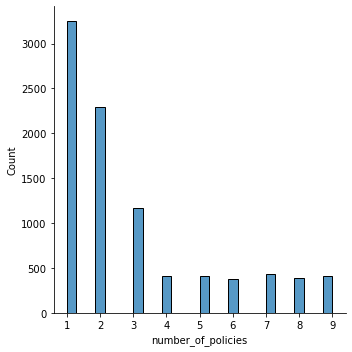

In [39]:
sns.displot(discrete_df.number_of_open_complaints)
plt.show()
sns.displot(discrete_df.number_of_policies)
plt.show()

both discrete variables have the highest count on the smalles value.
tendencie seems to be exponential decreasing (with 450 as asymptode of number_of_policies)

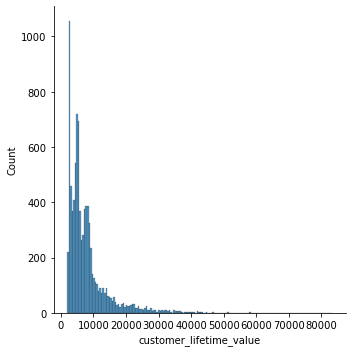

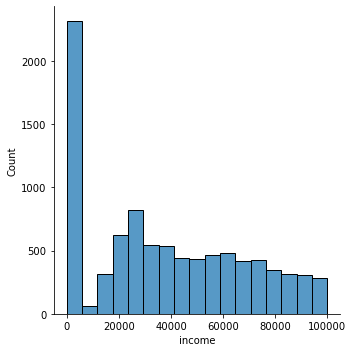

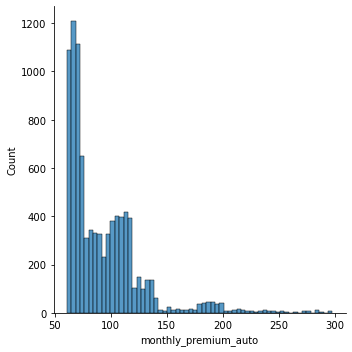

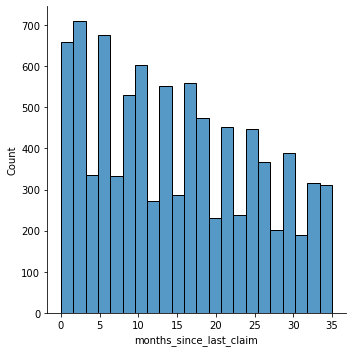

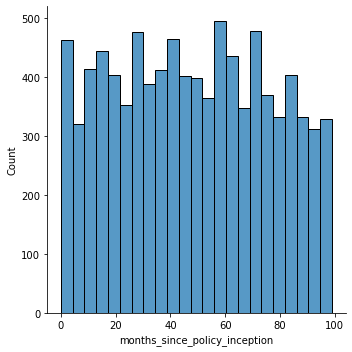

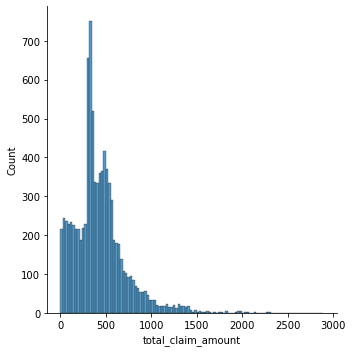

In [64]:
sns.displot(continuous_df.customer_lifetime_value)
plt.show()

sns.displot(continuous_df.income)
plt.show()

sns.displot(continuous_df.monthly_premium_auto)
plt.show()

sns.displot(continuous_df.months_since_last_claim)
plt.show()

sns.displot(continuous_df.months_since_policy_inception)
plt.show()

sns.displot(continuous_df.total_claim_amount)
plt.show()


many customer with a small custome_lifetime_value (< 10000)
a discrete peak at ~4000 could be a result of promotions in the past
counts decreases for bigger custome_lifetime_values

a clear peak of the income counts for income = 0 => customer who does not want to share there income
rest has no clear trend

most people have a monthly premium auto of about 60$ => could be a minimum value for a special giveaway
then for bigger premium auto the number of customers decreases 

the counts of months_since_last_claim decreases. holes in the counts could be the effect of binning a dataset with a small amount of different values. Could be made discrete by devide them in semester (if wanted) 

months_since_policy_inceptions seems humogeneous distributed

total_claim_amount has a clear peak at 400 => could be a result of the combination of the peaks of custome_lifetime_values and monthly_premium_auto for bigger total_claim_amounts the distribution decreases

Looking for outliers 1.customer_lifetime_value

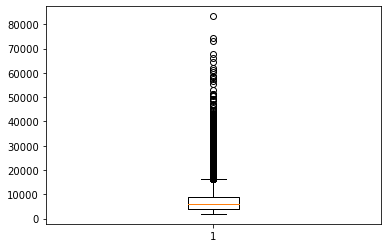

In [68]:
plt.boxplot(continuous_df.customer_lifetime_value)
plt.show()

outliers here are people with a lifetime_value > then 40000
the differences become smaller if we use the logarithm

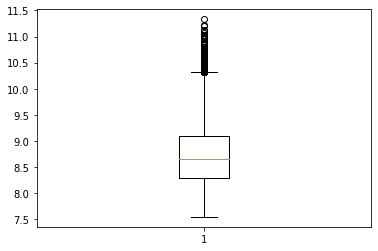

In [77]:
continuous_df.customer_lifetime_value_log=continuous_df.customer_lifetime_value.apply(np.log)

plt.boxplot(continuous_df.customer_lifetime_value_log)
plt.show()

2.total_claim_amount

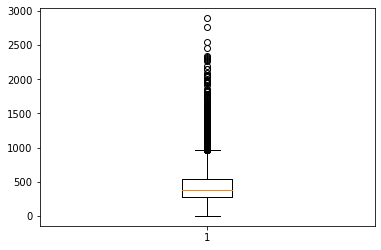

In [78]:
plt.boxplot(continuous_df.total_claim_amount)
plt.show()

Positive outliers are in this case very importent for a insurence company => use the log (no extra treating of amount< 0, all values are positive)

In [82]:
print(continuous_df.total_claim_amount.min())
continuous_df.total_claim_amount_log=continuous_df.total_claim_amount.apply(np.log)


0.099007


No other outliers